In [1]:
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt

In [2]:
# this is the "true" value of p for this test example.
def test_fn(x):
    return 0.22 - 3*x + 23 * np.power(x,2) - 40* np.power(x,3) + 20 * np.power(x,4)

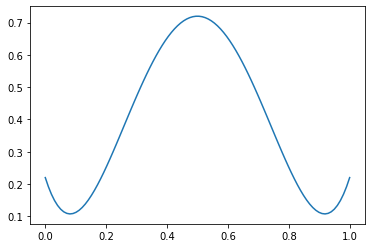

In [9]:
x1 = np.linspace(0,1,100)
y1 = test_fn(x1)
plt.plot(x1,y1)
plt.show()

In [4]:
def random_sample(size=None):
    """ get a random sample from [0,1] where the pdf is given by y = -2x + 2, cdf = -x^2 + 2x.
        This will weight samples to low x values so that variance/uncertainty should be different across the spectrum    
    """
    y = np.random.random(size=size)
    x1 = (-2 + np.sqrt(4 - 4 * y)) / -2
    return x1


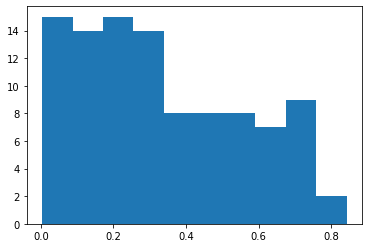

In [5]:
x = random_sample(size=100)
plt.hist(x)
plt.show()

In [6]:
def predict(p):
    """draw bernoulli random variables w parameter p"""
    r = np.random.random(p.size)
    q = p - r
    q[q > 0] = 1
    q [q <= 0] = 0
    return q

In [7]:
x = random_sample(size=100)
y = test_fn(x)
p = predict(y)

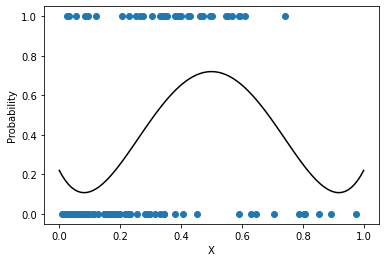

In [13]:
plt.plot(x1,y1, color='black')
plt.scatter(x,p)
plt.ylabel("Probability")
plt.xlabel("X")
plt.savefig("toy_example.png")

In [14]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [15]:
gpc = GaussianProcessClassifier().fit(x.reshape(-1,1),p)

In [16]:
u = []

In [17]:
gpc.predict_proba(x.reshape(-1,1), uncertainty=u)

array([[0.70016276, 0.29983724],
       [0.49174207, 0.50825793],
       [0.59018264, 0.40981736],
       [0.69249734, 0.30750266],
       [0.63859461, 0.36140539],
       [0.69910864, 0.30089136],
       [0.61725539, 0.38274461],
       [0.64656859, 0.35343141],
       [0.60975113, 0.39024887],
       [0.64574943, 0.35425057],
       [0.69688696, 0.30311304],
       [0.50236294, 0.49763706],
       [0.54476506, 0.45523494],
       [0.6026865 , 0.3973135 ],
       [0.59883884, 0.40116116],
       [0.64995313, 0.35004687],
       [0.66259138, 0.33740862],
       [0.63990682, 0.36009318],
       [0.66985061, 0.33014939],
       [0.67889907, 0.32110093],
       [0.69930372, 0.30069628],
       [0.56752725, 0.43247275],
       [0.60225566, 0.39774434],
       [0.6831515 , 0.3168485 ],
       [0.6249463 , 0.3750537 ],
       [0.54478383, 0.45521617],
       [0.56996965, 0.43003035],
       [0.65677588, 0.34322412],
       [0.67806812, 0.32193188],
       [0.64887414, 0.35112586],
       [0.

In [26]:
gpc.score(x.reshape(-1,1),p.reshape(-1,1))

0.59

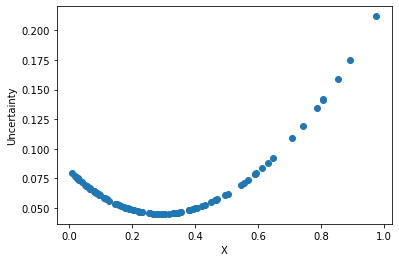

In [22]:
plt.scatter(x,u[0])
plt.ylabel("Uncertainty")
plt.xlabel("X")
plt.savefig("toy_uncertainty.png")